# Data Capture

In [1]:
import requests

In [2]:
url = "https://raw.githubusercontent.com/z3r0st/TF-201711448-20181C074-202021767/main/SF_street_intersections.csv"
file = requests.get(url).content
f = file.decode('utf-8')

data = f.split(sep='\n')[1:]
intercepts = dict()
streets = dict()
nodes = dict()
nodeToIntercept = dict()
c = 0
for line in data:
    if(len(line) == 0):
        continue
    street, point = line.split(sep=',')[1:3]
    lon, lat = point[7:-2].split()
    intercept = (float(lat), float(lon))
    if street in intercepts.keys():
        intercepts[street].append(intercept)
    else:
        intercepts[street] = [intercept]
    if intercept in streets.keys():
        streets[intercept].append(street)
    else:
        streets[intercept] = [street]
        nodes[intercept] = c
        nodeToIntercept[c] = intercept
        c += 1

In [3]:
intercepts['UTAH']

[(37.7543372313743, -122.40545417189192),
 (37.76841488233248, -122.40679858931149),
 (37.7607529052339, -122.40606109793055),
 (37.7619964030768, -122.4061819835959),
 (37.7658422711544, -122.40655282446389),
 (37.7512810744602, -122.40515881630326),
 (37.7594458071505, -122.40593403378597),
 (37.769298557428, -122.40688239974939),
 (37.7562225803215, -122.40521698628322),
 (37.7645476536961, -122.40642915445186),
 (37.7517869480963, -122.40520770296072),
 (37.7632538870406, -122.40630557076001),
 (37.75692043860479, -122.40525954218414),
 (37.753063831974, -122.40533110370748),
 (37.7671421818598, -122.40667700476389)]

In [4]:
streets[(37.7543372313743, -122.40545417189192)]

['UTAH', '23RD']

# Graph creation

In [5]:
import math

In [6]:
def toRadians(valor):
  return (math.pi/180.0)*valor

In [7]:
def calculateDistance(intercept1, intecerpt2):
  Lat1, Lon1 = intercept1
  Lat2, Lon2 = intecerpt2
  difLat = toRadians(Lat2 - Lat1)
  difLon = toRadians(Lon2 - Lon1)

  a = math.sin(difLat/2)**2 + math.cos(toRadians(Lat1))*math.cos(toRadians(Lat2))*(math.sin(difLon/2))**2
  c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a))

  return  6371000.0*c

In [128]:
def createGraph(streets, intercepts, nodes):
    G = [[] for i in range(len(streets.keys()))]
    
    for intercept in streets.keys():
        for street in streets[intercept]:
            neighbours = []
            for point in intercepts[street]:
                if point != intercept:
                    neighbours.append([point, calculateDistance(intercept, point)])
            
            if len(neighbours) > 1:
                neighbours.sort(key=lambda ls: ls[1])
                neighbours = neighbours[0:2]
                if calculateDistance(neighbours[0][0], neighbours[1][0]) < neighbours[1][1]:
                    neighbours.pop()
                
                G[nodes[intercept]].extend([[nodes[neighbours[x][0]], neighbours[x][1]] for x in range(len(neighbours))])
                
            elif len(neighbours) > 0:
                G[nodes[intercept]].append([nodes[neighbours[0][0]], neighbours[0][1]])
    
    return G

In [129]:
G_al = createGraph(streets, intercepts, nodes)

In [130]:
[G_al[nodes[i]] for i in intercepts['UTAH']]

[[[5321, 142.00833223494575],
  [4872, 210.67571229642408],
  [2454, 37.22465458994596]],
 [[4583, 98.53595309310332],
  [2117, 141.92080404386942],
  [1096, 85.59962750489584],
  [9243, 89.46714377658822]],
 [[2735, 138.67840534620814],
  [199, 145.7712698361287],
  [9582, 19.874859007408237]],
 [[2557, 138.67840534620814],
  [3713, 140.24725124381496],
  [5727, 84.8182804443879],
  [4401, 88.64615250101576]],
 [[1997, 144.3647746039867],
  [2117, 144.95504901139918],
  [2835, 85.29283053076041],
  [2228, 86.51620157812049]],
 [[5159, 56.414548358394235]],
 [[3362, 84.81852132917463],
  [7639, 89.48501702859892],
  [2557, 145.7712698361287]],
 [[1102, 98.53595309310332], [9151, 61.568912997825514]],
 [[329, 77.68843490865129], [0, 210.67571229642408]],
 [[2387, 85.13856652865068],
  [7320, 87.32945494578928],
  [3713, 144.26988119461396],
  [3030, 144.3647746039867]],
 [[3581, 56.414548358394235],
  [5321, 142.39690409315344],
  [2159, 85.16578097357856],
  [5910, 89.20420171624211]],

In [131]:
G_al[-10:]

[[[4972, 85.08929146449283]],
 [[6671, 88.54364979708429],
  [3948, 94.06394496294911],
  [5003, 207.41274819470334],
  [3837, 207.89167312864245]],
 [[255, 48.880654419431764]],
 [[3764, 28.24158660523248]],
 [[6843, 33.43101608987303]],
 [[8183, 133.47862835591962], [5433, 147.90161388528514]],
 [[3396, 117.85140412807054]],
 [[7416, 178.6633900378549]],
 [[3433, 72.84921868898316]],
 [[6486, 114.39235270617861]]]

In [132]:
G_al[G_al[0][0][0]][0]

[5096, 85.33774423925937]

## Testing the distance calculation (Km)

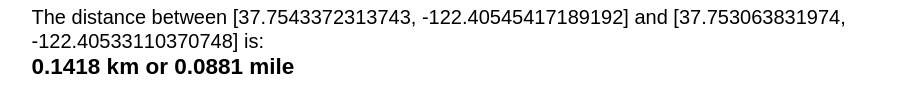

In [133]:
calculateDistance((37.7543372313743,-122.40545417189192),(37.753063831974,-122.40533110370748))

142.00833223494575

In [134]:
# our distance is measured in meters, so 0.1418 km = 141.8 m
assert calculateDistance((37.7543372313743,-122.40545417189192),(37.753063831974,-122.40533110370748)) > 141.8*0.99 
assert calculateDistance((37.7543372313743,-122.40545417189192),(37.753063831974,-122.40533110370748)) < 141.8*1.01
# checking that the calculated distance is within a 1% error margin of the real value

In [135]:
nodeToIntercept[0]

(37.7543372313743, -122.40545417189192)

In [136]:
nodeToIntercept[5321]

(37.753063831974, -122.40533110370748)

In [137]:
calculateDistance(nodeToIntercept[0], nodeToIntercept[5321])

142.00833223494575

In [138]:
assert 0 in [v for v, w in G_al[G_al[0][0][0]]]
assert 0 in [v for v, w in G_al[G_al[0][1][0]]]

# Tests

In [139]:
def commonStreet(ls1, ls2):
    for street in ls1:
        if street in ls2:
            return True
    return False

In [140]:
assert commonStreet(streets[nodeToIntercept[G_al[0][0][0]]], streets[nodeToIntercept[0]])
assert commonStreet(streets[nodeToIntercept[G_al[0][1][0]]], streets[nodeToIntercept[0]])

In [141]:
assert commonStreet(streets[nodeToIntercept[G_al[1][0][0]]], streets[nodeToIntercept[1]]) 
assert commonStreet(streets[nodeToIntercept[G_al[1][1][0]]], streets[nodeToIntercept[1]])

# Writing the graph adjacency list

In [142]:
f = open("weighted_graph.al", "w")
f.write(str(len(G_al))+'\n')
c = 0
for line in G_al:
    f.write(str(c)+' ')
    if len(line) > 0:
        for x, y in line:
            f.write(str(x)+','+str(y)+' ')
    else:
        f.write('-')
    f.write('\n')
    c += 1

# Read graph from adjacency list 

In [24]:
with open("weighted_graph.al", "r") as f:
    n = int(f.readline().strip())
    G = [[] for _ in range(n)]
    
    for line in f:
        line = line.strip().split()
        u = int(line[0])
        for pair in line[1:]:
            G[u].append([int(v), float(w)] for v, w in pair.split(sep=','))

# Adding traffic

## Custom

In [24]:
pip install perlin_noise

Note: you may need to restart the kernel to use updated packages.


In [23]:
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

In [143]:
noise = PerlinNoise(octaves=3.5, seed=777)

In [144]:
noise([29, 30.5])

0.092731095571599

In [145]:
def timeFactor(time):
    timeToTraffic = [(1, 1.5), (1, 1.3), (1, 1.1), (1, 1.2), (1, 1.5), (1, 2), (1.1, 3.2), (1.5, 5.5), 
               (1.3, 4), (1, 2.5), (1, 2), (1.1, 2.8), (1.3, 4), (1.4, 4.1), (1.1, 3), (1.1, 2.5), 
               (1.1, 2.6), (1.3, 4), (1.5, 5.2), (1.5, 5.5), (1.1, 4.4), (1, 2.2), (1, 2), (1, 1.6)]
    
    return timeToTraffic[int(time[:2])]

```
fMin, fMax = tFactor[t]
w = w * (fMin + noise([lat1, lon1, lat2, lat2]) * (fMax - fMin))
```

In [146]:
def addTraffic(G, nodeToIntercept, time):
    tMin, tMax = timeFactor(time)
    for u in range(len(G)):
        for i in range(len(G[u])):
            v, w = G[u][i]
            lat, lon = map(lambda c1, c2: 10*(c1+c2)/2, nodeToIntercept[u], nodeToIntercept[v])
            zoneFactor = noise([lat, lon]) + 0.707
            def linearRescale(x, l, r):
                return x*(r - l)/(0.707 - -0.707) # E [-0.707, 0.707]
            zoneFactor = linearRescale(zoneFactor, tMin, tMax)
            # convert to int because < 1m is a negligible value
            G[u][i][1] = int(w * (tMin + zoneFactor))

In [147]:
addTraffic(G_al, nodeToIntercept, "19:38:29")

In [148]:
[G_al[nodes[i]] for i in intercepts['UTAH']]

[[[5321, 483], [4872, 719], [2454, 127]],
 [[4583, 302], [2117, 439], [1096, 266], [9243, 273]],
 [[2735, 456], [199, 485], [9582, 65]],
 [[2557, 456], [3713, 456], [5727, 279], [4401, 288]],
 [[1997, 457], [2117, 453], [2835, 270], [2228, 270]],
 [[5159, 190]],
 [[3362, 285], [7639, 298], [2557, 485]],
 [[1102, 302], [9151, 189]],
 [[329, 265], [0, 719]],
 [[2387, 273], [7320, 276], [3713, 463], [3030, 457]],
 [[3581, 190], [5321, 483], [2159, 289], [5910, 300]],
 [[2954, 211], [2356, 283], [2735, 456], [1997, 463]],
 [[616, 159], [4872, 265], [199, 971]],
 [[5096, 291], [5832, 300], [0, 483], [5159, 483]],
 [[6714, 268], [8629, 274], [1102, 439], [3030, 453]]]

In [149]:
G_al[-10:]

[[[4972, 356]],
 [[6671, 404], [3948, 427], [5003, 949], [3837, 941]],
 [[255, 198]],
 [[3764, 109]],
 [[6843, 113]],
 [[8183, 445], [5433, 494]],
 [[3396, 281]],
 [[7416, 666]],
 [[3433, 278]],
 [[6486, 361]]]

# Finding shortest paths

In [49]:
import heapq as hq

In [182]:
def dijkstra(G, source, sink=None, parent=None):
    n = len(G)
    if parent is None: parent = [None]*n
    heap = [(0, source, None)]
    
    while heap:
        c, u, p = hq.heappop(heap)
        
        if parent[u] is not None: continue
            
        parent[u] = (p, c)
        
        if sink and u == sink:
            path = [u]
            cost = [c]
            
            while(u != source):
                u = parent[u][0]
                c = parent[u][1]
                path.append(u)
                cost.append(c)
            
            for i in range(len(cost)-2):
                cost[i] -= cost[i+1]
            path.reverse()
            cost.reverse()
            return [path, cost]
        
        for v, w in G[u]:
            if parent[v] is None and w > 0:
                hq.heappush(heap, (c + w, v, u))

In [206]:
def YenKSP(G, source, sink, K=0):
    A = [[] for _ in range(K)]
    A[0] = dijkstra(G, source, sink)
    B = []
    
    print(A[0])
    if A[0] is None: return A
    
    for k in range(K-1):
        for i in range(len(A[k][0]) - 1):
            parent = [None]*len(G)
            
            spurNode = A[k][0][i]
            rootPath = [A[k][0][:i+1], A[k][1][:i+1]]
            
            disabledEdges = []
            for path in A:
                if path == []: continue
                if path[0][:i+1] == rootPath[0]:
                    u = path[0][i]
                    for j in range(len(G[u])):
                        v, w = G[u][j]
                        if v == path[0][i+1]: 
                            G[u][j][1] = 0
                            disabledEdges.append((u, j, w))
            
            rootPath[0].pop()
            rootPath[1].pop()
            for node in rootPath[0]:
                parent[node] = -1
            
            spurPath = dijkstra(G, source, sink, parent)
            
            for u, j, w in disabledEdges:
                G[u][j][1] = w
            
            if spurPath is None: continue
            
            totalPath = spurPath if i == 0 else [rootPath[0] + spurPath[0], rootPath[1] + spurPath[1]]
            B.append(totalPath)
            
        if B == []: break
        
        B = sorted(B, key=lambda b: sum(b[1]))
        A[k+1] = B.pop(0)
        
    return A

## Testings

In [52]:
import random

In [187]:
source = 0
sink = 4294
K = 3

paths = YenKSP(G_al, source, sink, K)
for k in range(K):
    if paths[k] == []:
        print(f"{k}. No applicable path from point {source} to point {sink}\n")
    else:
        print(paths[k][0], f"Total distance: {sum(paths[k][1])}\n", sep='\n')

[0, 4872, 329, 616, 4906, 4294]
Total distance: 1437

[0, 2454, 8573, 8310, 4785, 4294]
Total distance: 1579

[0, 5321, 5096, 8573, 8310, 4785, 4294]
Total distance: 2550



In [207]:
source = 0
sink = 8310
K = 3

paths = YenKSP(G_al, source, sink, K)
for k in range(K):
    if paths[k] == []:
        print(f"{k}. No applicable path from point {source} to point {sink}")
    else:
        print(paths[k][0], f"Total distance: {sum(paths[k][1])}")

[[0, 2454, 8573, 8310], [0, 127, 165, 293]]
[0, 2454, 8573, 8310] Total distance: 585
[0, 5321, 5096, 8573, 8310] Total distance: 1556
[0, 4872, 329, 616, 9223, 4255, 3362, 1856, 4909, 2278, 1990, 2874, 5099, 1835, 8310] Total distance: 5648


In [217]:
N = 3

for n in range(N):
    source = 0
    sink = source
    K = 3
    for _ in range(10):
        index = random.randint(0, len(G_al[sink]) - 1)
        sink = G_al[sink][index][0]
 
    paths = YenKSP(G_al, source, sink, K)
    print(f"\nTEST {n+1}\n")
    for k in range(K):
        if paths[k] == None or paths[k] == []:
            print(f"{k}. No applicable path from point {source} to point {sink}\n")
        else:
            print(paths[k][0], f"Total distance: {sum(paths[k][1])}\n", sep='\n')

[[0, 4872, 329, 199, 2557], [0, 719, 265, 971, 485]]

TEST 1

[0, 4872, 329, 199, 2557]
Total distance: 2440

[0, 2454, 8573, 8310, 4785, 4294, 4906, 616, 329, 199, 2557]
Total distance: 3488

[0, 5321, 5096, 8573, 8310, 4785, 4294, 4906, 616, 329, 199, 2557]
Total distance: 4459

None

TEST 2

0. No applicable path from point 0 to point 0

1. No applicable path from point 0 to point 0

2. No applicable path from point 0 to point 0

[[0, 4872, 329, 199, 2557, 2735, 4401], [0, 719, 265, 971, 485, 456, 288]]

TEST 3

[0, 4872, 329, 199, 2557, 2735, 4401]
Total distance: 3184

[0, 2454, 8573, 8310, 4785, 4294, 4906, 616, 329, 199, 2557, 2735, 4401]
Total distance: 4232

[0, 5321, 5832, 5054, 5732, 8664, 6417, 6702, 3889, 2771, 4719, 4401]
Total distance: 4673

